# Overlaying speed traces of two laps

Compare two fastest laps by overlaying their speed traces.


In [5]:
import matplotlib.pyplot as plt

import fastf1.plotting


# enable some matplotlib patches for plotting timedelta values and load
# FastF1's default color scheme
fastf1.plotting.setup_mpl(misc_mpl_mods=False)

# load a session and its telemetry data
session = fastf1.get_session(2024, 'Jeddah', 'R')
session.load()

core           INFO 	Loading data for Saudi Arabian Grand Prix - Race [v3.3.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '16', '81', '14', '63', '38', '4', '44', '27', '23', '20', '31', '22', '2', '3', '77', '24', '18', '10']


First, we select the two laps that we want to compare



In [6]:
nor_lap = session.laps.pick_driver('NOR').pick_fastest()
ham_lap = session.laps.pick_driver('HAM').pick_fastest()

Next we get the telemetry data for each lap. We also add a 'Distance' column
to the telemetry dataframe as this makes it easier to compare the laps.



In [7]:
nor_lap = nor_lap.get_car_data().add_distance()
ham_tel = ham_lap.get_car_data().add_distance()

Finally, we create a plot and plot both speed traces.
We color the individual lines with the driver's team colors.



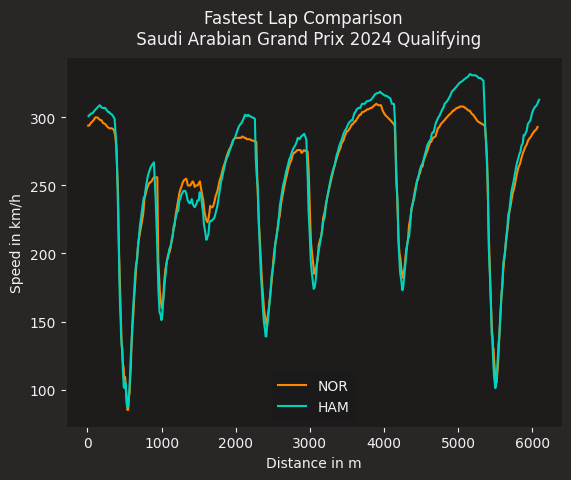

In [8]:
mcl_color = fastf1.plotting.team_color('MCL')
mer_color = fastf1.plotting.team_color('MER')

fig, ax = plt.subplots()
ax.plot(nor_lap['Distance'], nor_lap['Speed'], color=mcl_color, label='NOR')
ax.plot(ham_tel['Distance'], ham_tel['Speed'], color=mer_color, label='HAM')

ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')

ax.legend()
plt.suptitle(f"Fastest Lap Comparison \n "
             f"{session.event['EventName']} {session.event.year} Qualifying")

plt.show()